In [1]:
!pip install tensorflow
!pip install nltk
!pip install colorama
!pip install numpy
!pip install scikit_learn
!pip install Flask
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\avari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\avari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\avari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\avari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\avari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\avari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\avari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import json
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [14]:
with open('C:/Users/avari/OneDrive/Documents/AI Final Project/intents.json') as file:
    data = json.load(file)

training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

num_classes = len(labels)

In [15]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [16]:
vocab_size = 45000
embedding_dim = 350
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [17]:
# Model Testing
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 350)           15750000  
                                                                 
 global_average_pooling1d_1  (None, 350)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 300)               105300    
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 28)                8428      
                                                                 
Total params: 15954028 (60.86 MB)
Trainable params: 15954028 (60.86 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [18]:
# Define EarlyStopping callback to monitor both training loss and accuracy
early_stopping = keras.callbacks.EarlyStopping(
    monitor='loss',  # Monitor training loss
    patience=10,  # Wait for 10 epochs with no improvement
    restore_best_weights=True
)

In [19]:
# Epochs
epochs = 200
history = model.fit(
    padded_sequences, np.array(training_labels),
    epochs=epochs,
    callbacks=[early_stopping]
)


Epoch 1/200
5/5 [==============================] - 1s 92ms/step - loss: 3.3350 - accuracy: 0.0397
Epoch 2/200
5/5 [==============================] - 0s 80ms/step - loss: 3.3254 - accuracy: 0.0662
Epoch 3/200
5/5 [==============================] - 0s 54ms/step - loss: 3.3191 - accuracy: 0.0662
Epoch 4/200
5/5 [==============================] - 0s 68ms/step - loss: 3.3120 - accuracy: 0.0662
Epoch 5/200
5/5 [==============================] - 0s 55ms/step - loss: 3.3038 - accuracy: 0.0662
Epoch 6/200
5/5 [==============================] - 0s 55ms/step - loss: 3.2950 - accuracy: 0.0662
Epoch 7/200
5/5 [==============================] - 0s 54ms/step - loss: 3.2846 - accuracy: 0.0662
Epoch 8/200
5/5 [==============================] - 0s 54ms/step - loss: 3.2753 - accuracy: 0.0662
Epoch 9/200
5/5 [==============================] - 0s 75ms/step - loss: 3.2617 - accuracy: 0.0662
Epoch 10/200
5/5 [==============================] - 0s 80ms/step - loss: 3.2427 - accuracy: 0.0662
Epoch 11/200
5/5 [=

In [20]:
# Print average model loss and accuracy
average_loss = np.mean(history.history['loss'])
average_accuracy = np.mean(history.history['accuracy'])
print(f'Average Loss: {average_loss:.4f}')
print(f'Average Accuracy: {average_accuracy:.4f}')

Average Loss: 0.7142
Average Accuracy: 0.8088


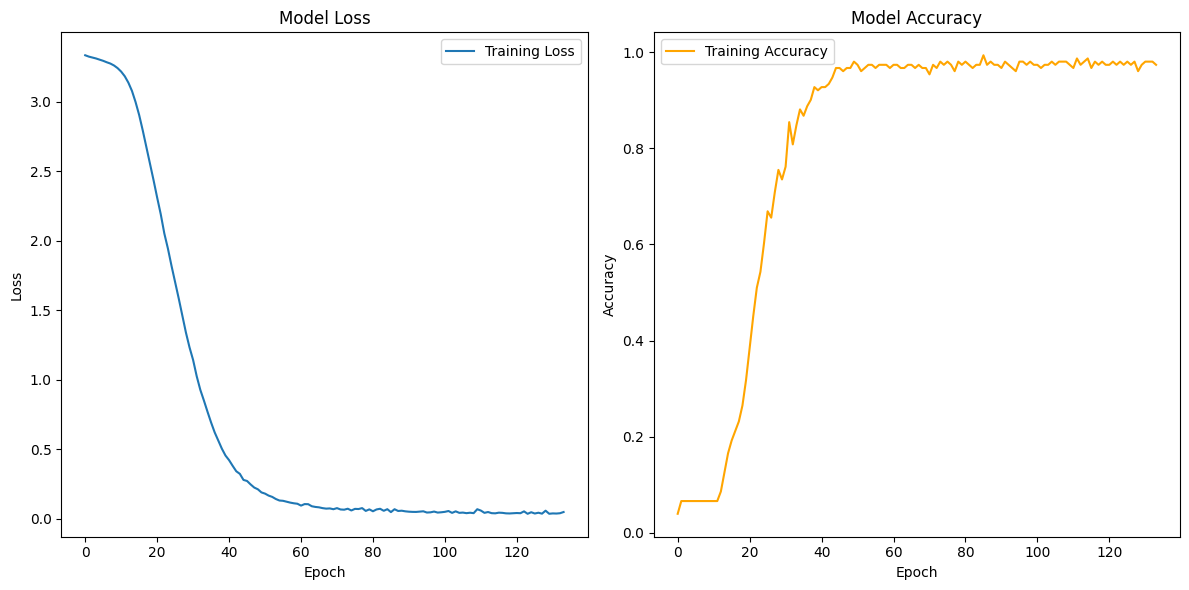

In [21]:
# Plot model loss and accuracy in one graph
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Combine both subplots into a single graph
plt.tight_layout()

plt.show()

In [22]:
# to save the trained model
model.save("C:/Users/avari/OneDrive/Documents/AI Final Project/Test/chat_model")

import pickle

# to save the fitted tokenizer
with open('C:/Users/avari/OneDrive/Documents/AI Final Project/Test/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# to save the fitted label encoder
with open('C:/Users/avari/OneDrive/Documents/AI Final Project/Test/label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: C:/Users/avari/OneDrive/Documents/AI Final Project/Test/chat_model\assets


INFO:tensorflow:Assets written to: C:/Users/avari/OneDrive/Documents/AI Final Project/Test/chat_model\assets


In [23]:
import json
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("C:/Users/avari/OneDrive/Documents/AI Final Project/intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('C:/Users/avari/OneDrive/Documents/AI Final Project/Test/chat_model')

    # load tokenizer object
    with open('C:/Users/avari/OneDrive/Documents/AI Final Project/Test/tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('C:/Users/avari/OneDrive/Documents/AI Final Project/Test/label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20

    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])[0]

        intent_found = False
        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "Companion Bot:" + Style.RESET_ALL, np.random.choice(i['responses']))
                intent_found = True
                break

        if not intent_found:
            default_response = "Sorry, I couldn't catch that, can you repeat please?"
            print(Fore.RED + "Companion Bot:" + Style.RESET_ALL, default_response)

# Add a welcome message
print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)

# Start the chat
chat()

Start messaging with the bot (type quit to stop)!
1/1 [==============================] - 0s 43ms/step
Companion Bot: Greetings! I'm here to chat and support you. How are you doing?
1/1 [==============================] - 0s 16ms/step
Companion Bot: I love hearing about exciting moments! What's making you feel so thrilled?
1/1 [==============================] - 0s 17ms/step
Companion Bot: My pleasure! Your well-being is important, and I'm here for you.
1/1 [==============================] - 0s 17ms/step
Companion Bot: Despite challenges, your sense of hope is inspiring. Share the aspects of the future that you're feeling optimistic about.
1/1 [==============================] - 0s 16ms/step
Companion Bot: I'm grateful for the opportunity to assist you. If there's anything specific you'd like to talk about, feel free to share.
1/1 [==============================] - 0s 20ms/step
Companion Bot: Thank you for your kind words! I'm here to assist you whenever you need.
1/1 [====================